In [9]:
%matplotlib inline
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

No modelo de McKenzie (1978), uma porção da litosfera de largura $a_L$ é instantaneamente estirada até atingir o comprimento $a_L \beta$, resultando em um soerguimento do manto astenosférico. Após isto, a perturbação térmica é gradualmente dissipada por difusão térmica, restaurando o perfil de temperatura anterior ao estiramento.

Neste modelo a temperatura $T$ é função do tempo $t$ e da profundidade $z$ ($T=T(t,z)$). A equação que rege a condução térmica é dada por:
$$
\frac{\partial T}{\partial t}=
\kappa \frac{\partial^2 T}{\partial z^2}
$$
onde $\kappa$ é a difusividade térmica do material dado por
$$
\kappa = \frac{k_T}{\rho c}
$$
sendo $k_T$ a condutividade térmica do meio, $\rho$ a densidade da rocha e $c$ o calor específico.


Antes do estiramento, o perfil de temperatura está em equilíbrio, variando linearmente com a profundidade, de $T=T_1$ na base da litosfera ($z=-a_L$) para $T=0$ na superfície ($z=0$). Logo após o estiramento litosférico, em $t=0$, o perfil de temperatura é

$$
T=T_1 \frac{-z}{a_L/\beta} \quad \mbox{para} \quad -a_L/\beta < z \leq 0
$$

$$
T=T_1 \quad \mbox{para} \quad -a_L < z \leq -a_L/\beta.
$$

A evolução térmica da litosfera é dada por


$$
\frac{T}{T_1}=-\frac{z}{a_L}+\frac{2}{\pi} \sum_{n=0}^\infty \frac{-1}{n}
\left[ \frac{\beta}{n\pi}\sin\frac{n\pi}{\beta}\right] \times
\exp\left(\frac{-n^2t}{\tau}\right) \sin\frac{n\pi z}{a_L}
$$
onde
$$\tau=\frac{a_L^2}{\pi^2 \kappa}$$ 

Para visualizarmos a evolução da temperatura com o tempo vamos reescrever a expressão para a temperatura em Python. Primeiramente vamos criar o domínio em $z$ variando de $-a_L$ até $0$. Para isto vamos usar o comando arange.

In [10]:
aL = 125000 #espessura da litosfera em m
z = np.arange(-aL,0.1,1000)

Agora vamos escrever a expressão para a temperatura:

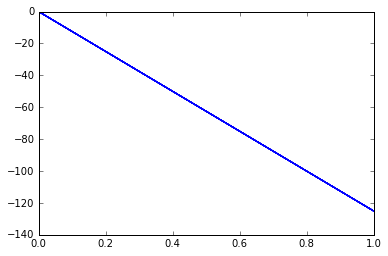

In [11]:
SPA = 365.*24.*60.*60.
beta = 4
T1 = 1300.0
kappa = 1.0E-6
Tau = aL*aL/(np.pi*np.pi*kappa)
t=0.0
#loop do tempo
while t<200.0E6*SPA:
    
    T = -z/aL
    n=1
    
    #escreva aqui a expressão para a temperatura T
    
    t = t+ 10.0*1E6*SPA
    plt.plot(T,z/1000,"b")

Vamos agora determinar a subsidência tectônica dada pela seguinte expressão:
$$
e(t) = \frac{a_L \rho_0 \alpha T_1}{\rho_0-\rho_w} \left \{
\frac{4}{\pi^2}
\sum_{m=0}^\infty \frac{1}{(2m+1)^2}\times \left[
\frac{\beta}{(2m+1)\pi} \sin \frac{(2m+1)\pi}{\beta}
\right]
\exp \left(
-(2m+1)^2 \frac{t}{t}
\right)
\right \}
$$

In [12]:
rho0 = 3300.
rhow = 1000.
alpha = 3.28E-5

escala = (4/(np.pi**2))*aL*rho0*alpha*T1/(rho0-rhow)

In [13]:
tempo = np.arange(0,201.0E6*SPA,1.0E6*SPA)

(3000, 0)

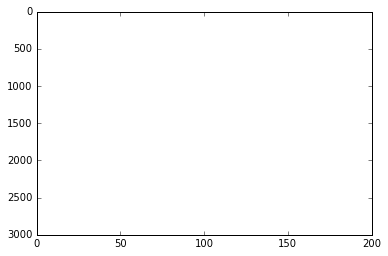

In [14]:
m=0
es = tempo*0

#escreva aqui a expressão para a função e(t)
    
es = es*escala

subsidencia = es[0]-es
    
plt.plot(tempo/(SPA*1E6),subsidencia,"k")
plt.ylim([3000,0])

In [15]:
Tempo1,Sub1 = np.loadtxt("COST-B2_lower.txt",unpack=True)
Tempo2,Sub2 = np.loadtxt("COST-B2_upper.txt",unpack=True)

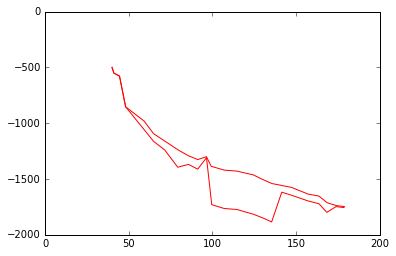

In [16]:
shift_v = 500
plt.plot(Tempo1+40,Sub1-shift_v,"r")
plt.plot(Tempo2+40,Sub2-shift_v,"r")
plt.plot(tempo/(SPA*1E6),-subsidencia,"k")